<a href="https://colab.research.google.com/github/srigouri/Data-Science-Dissertation/blob/main/BreastCancer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ** Ensemble methods on Breast Cancer Data**


# Importing Libraries:

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


## Loading the Data:

Source of Data:

Dataset is available on Kaggle @ https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset .

This dataset is also available through the UCI Machine Learning repository @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

From a digitized image of a fine needle aspirate (FNA) of a breast mass which is said to be tumour, the features in the dataset are calculated. They explain the properties of the cell nuclei present in the image.

In [ ]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/srigouri/Data-Science-Dissertation/main/data%20(1).csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The Dataset contains 33 columns and 569 rows which include ID of patient as first column and mean, Standard error and worst of ten measures of tumour in the image captured with the help of FNA type of biopsy. These include measures of parameters like radius, texture, area, perimeter, smoothness, compactness,concave points, concavity, symmetry, fractal dimension.

## Exploring the Data:

In [ ]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Cleaning the Data :
Dropping ID column as it is not used for analysis and training the model and 32nd column which is all NaNs

In [ ]:
cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

The "diagnosis" column is the outcome to be predicted i.e., classification variable which contains two values 'M' = Malignant ,'B'= Benign where malignant means high risk and benign means low risk of having breast cancer.

In [ ]:
cancer_data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Visualising the Features:

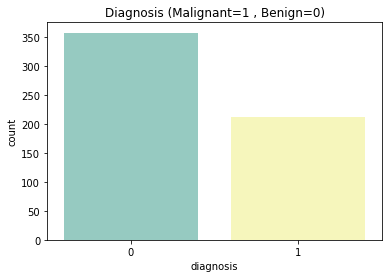

In [ ]:
ax = sns.countplot(cancer_data['diagnosis'], label = 'Count',palette="Set3")
plt.title('Diagnosis (Malignant=1 , Benign=0)')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

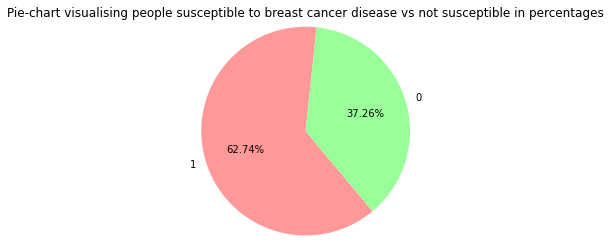

In [ ]:
plt.title("Pie-chart visualising people susceptible to breast cancer disease vs not susceptible in percentages")
plt.pie(cancer_data.diagnosis.value_counts(),
        labels=[1,0],
        colors = ['#ff9999','#99ff99'],
        autopct='%1.2f%%',
        startangle=84,
        radius=1.2)

plt.axis("off")

# Analysing features relation with Diagnosis result:


In [ ]:
def bar_plot(x,y):
    fig=plt.figure(figsize=(5,5))
    sns.barplot(x=x,y=y,data=cancer_data)
    plt.title(f'{x} vs {y}')

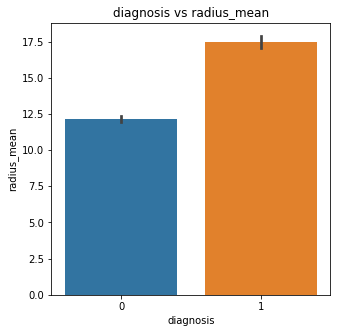

In [ ]:
bar_plot('diagnosis','radius_mean')


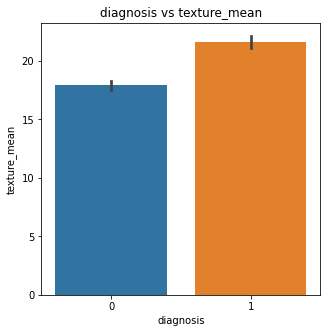

In [ ]:
bar_plot('diagnosis','texture_mean')

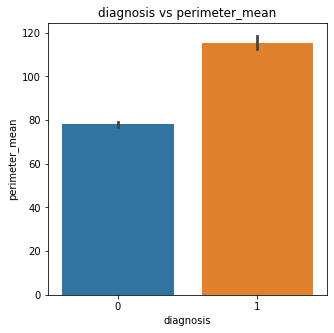

In [ ]:
bar_plot('diagnosis','perimeter_mean')

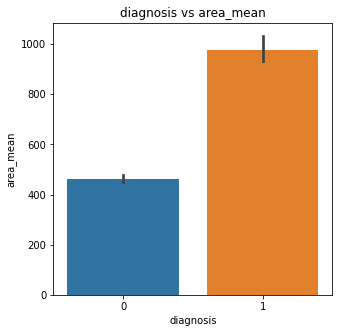

In [ ]:
bar_plot('diagnosis','area_mean')

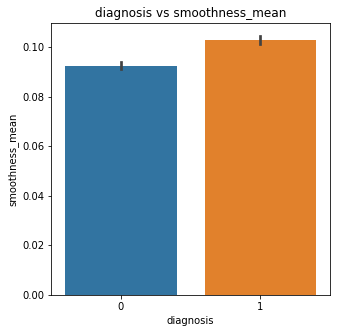

In [ ]:
bar_plot('diagnosis','smoothness_mean')

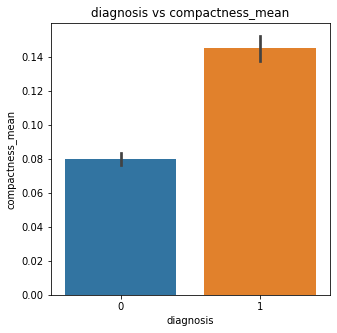

In [ ]:
bar_plot('diagnosis','compactness_mean')

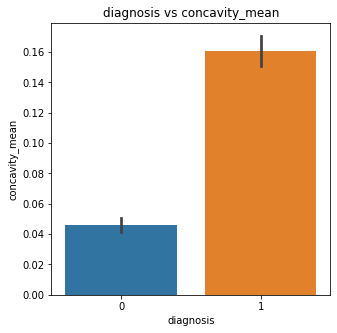

In [ ]:
bar_plot('diagnosis','concavity_mean')

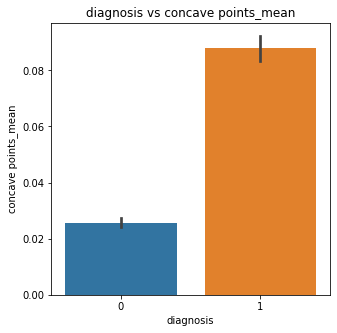

In [ ]:
bar_plot('diagnosis','concave points_mean')

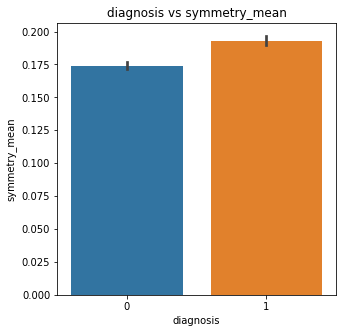

In [ ]:
bar_plot('diagnosis','symmetry_mean')

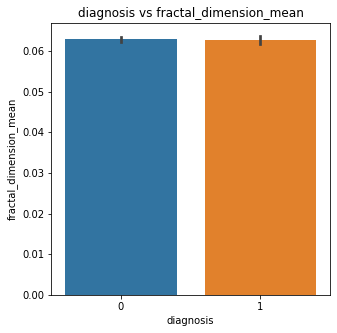

In [ ]:
bar_plot('diagnosis','fractal_dimension_mean')

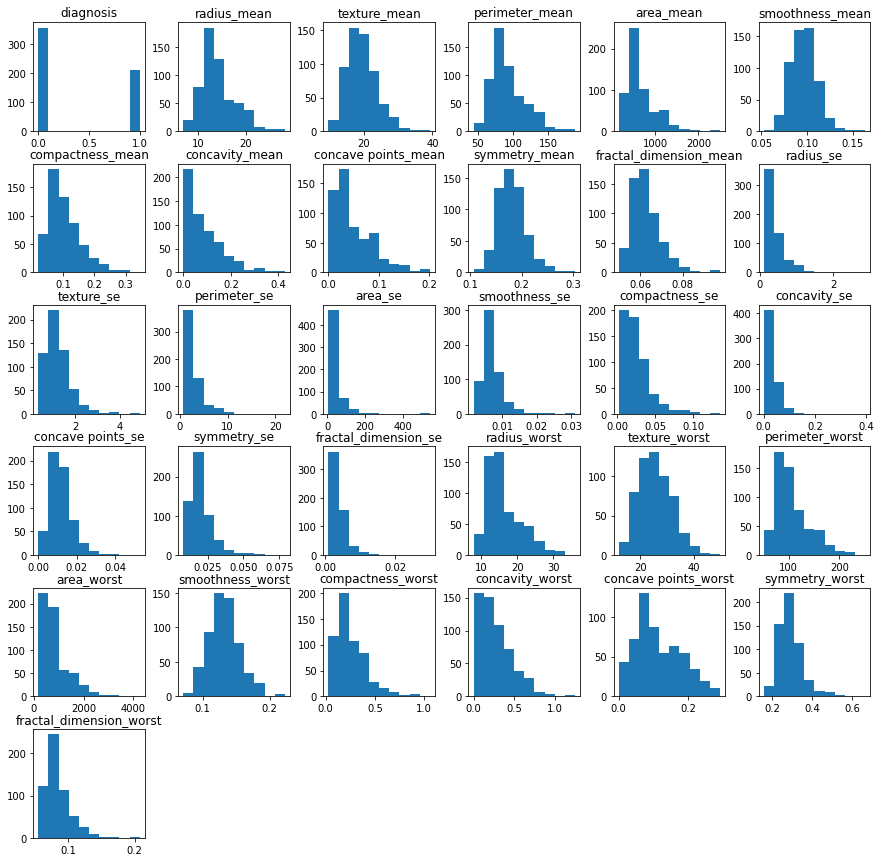

In [ ]:
hist_mean=cancer_data.hist(bins=10, figsize=(15, 15),grid=False,)

# Dividing the Dataset into two groups based on the diagnosis result:


In [ ]:
high_risk = cancer_data[cancer_data['diagnosis']==1]
low_risk = cancer_data[cancer_data['diagnosis']==0]

In [ ]:
high_risk.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

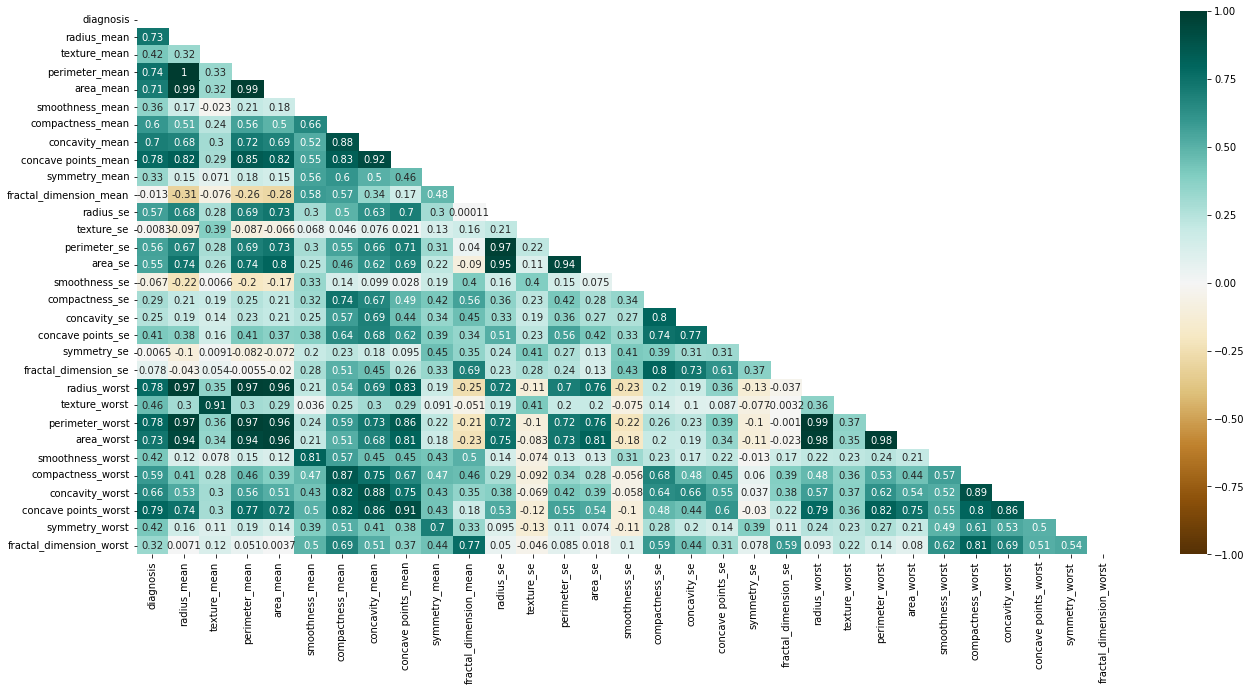

In [ ]:
plt.figure(figsize=(22, 10))
mask = np.triu(np.ones_like(cancer_data.corr(), dtype=np.bool))
corr_heatmap=sns.heatmap(cancer_data.corr(),mask=mask,vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

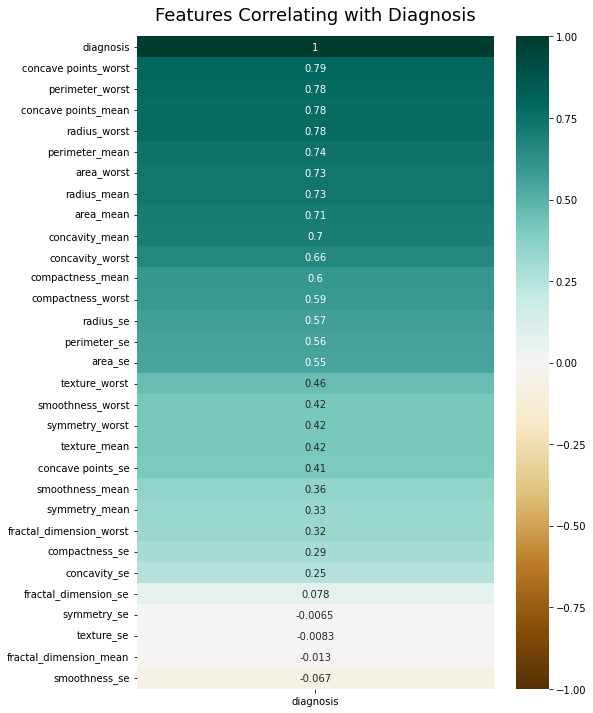

In [ ]:
plt.figure(figsize=(8, 12))
heatmap_diagnosis = sns.heatmap(cancer_data.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_diagnosis.set_title('Features Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16);

#splitting the cancer data into the three different sets and print the lists:

In [ ]:
features_mean = list(cancer_data.columns[0:11])
features_se = list(cancer_data.columns[11:21])
features_worst = list(cancer_data.columns[21:31])

print (features_mean)
print (features_se)
print (features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
